In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = "100"
lie_type = "attack_all_90000_with_suspects"

In [3]:
statuses = {0: "no endpoint blacklisted", 1: "one endpoint blacklisted", 2: "both endpoints blacklisted"}
colors = {"no endpoint blacklisted": "green", 
          "one endpoint blacklisted": "blue", 
          "both endpoints blacklisted": "red"}

In [4]:
data= pd.read_csv("data/fixed_liars/percentage/test_"
                  +N+"_nodes_"+lie_type+".csv")[[
    "node_1","node_2","lie_percentage","nb_strikes_1","nb_strikes_2","threshold"]]

threshold = data["threshold"][0]

In [5]:
grouped = pd.DataFrame(data\
    .groupby(["nb_strikes_1", "node_1"])["lie_percentage"]\
    .apply(list)).reset_index()

lies_N = pd.DataFrame(grouped[grouped["node_1"] == "N5"]["lie_percentage"]).reset_index()["lie_percentage"][0]

print(list(pd.DataFrame(lies_N).sort_values(by=0)[0]))

[0.15, 0.84, 1.73, 1.82, 3.24, 3.51, 4.66, 5.66, 6.65, 7.14, 7.6, 10.28, 11.58, 11.64, 11.99, 12.65, 13.85, 14.44, 15.13, 15.2, 16.97, 21.97, 22.54, 22.67, 23.32, 26.92, 27.35, 27.43, 29.59, 29.87, 30.19, 30.2, 32.27, 32.89, 35.1, 35.63, 37.68, 38.22, 38.48, 40.2, 40.7, 41.04, 42.19, 42.25, 43.56, 43.65, 44.36, 46.62, 46.76, 49.2, 51.57, 54.22, 55.75, 56.29, 60.65, 61.92, 63.62, 64.45, 64.77, 65.87, 67.46, 67.79, 78.33, 79.27, 80.77, 81.04, 82.98, 83.4, 85.13, 86.01, 86.14, 87.02, 87.2, 87.66, 88.25, 90.57, 92.12, 92.99, 96.18, 96.99, 98.74, 99.28, 100.44, 101.5, 102.58, 103.25, 106.36, 108.38, 109.37, 109.5, 112.5, 116.73, 117.84, 117.97, 118.21, 122.71, 124.67, 133.45, 165.31]


In [6]:
nb_strikes = data\
    .groupby(["nb_strikes_1", "node_1"])["lie_percentage"]\
    .apply(list)\
    .reset_index()["nb_strikes_1"]


In [7]:
#data['strike_quartiles'] = pd.qcut(data['nb_strikes_1'], 5)

/home/sabrina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


<Figure size 432x288 with 0 Axes>

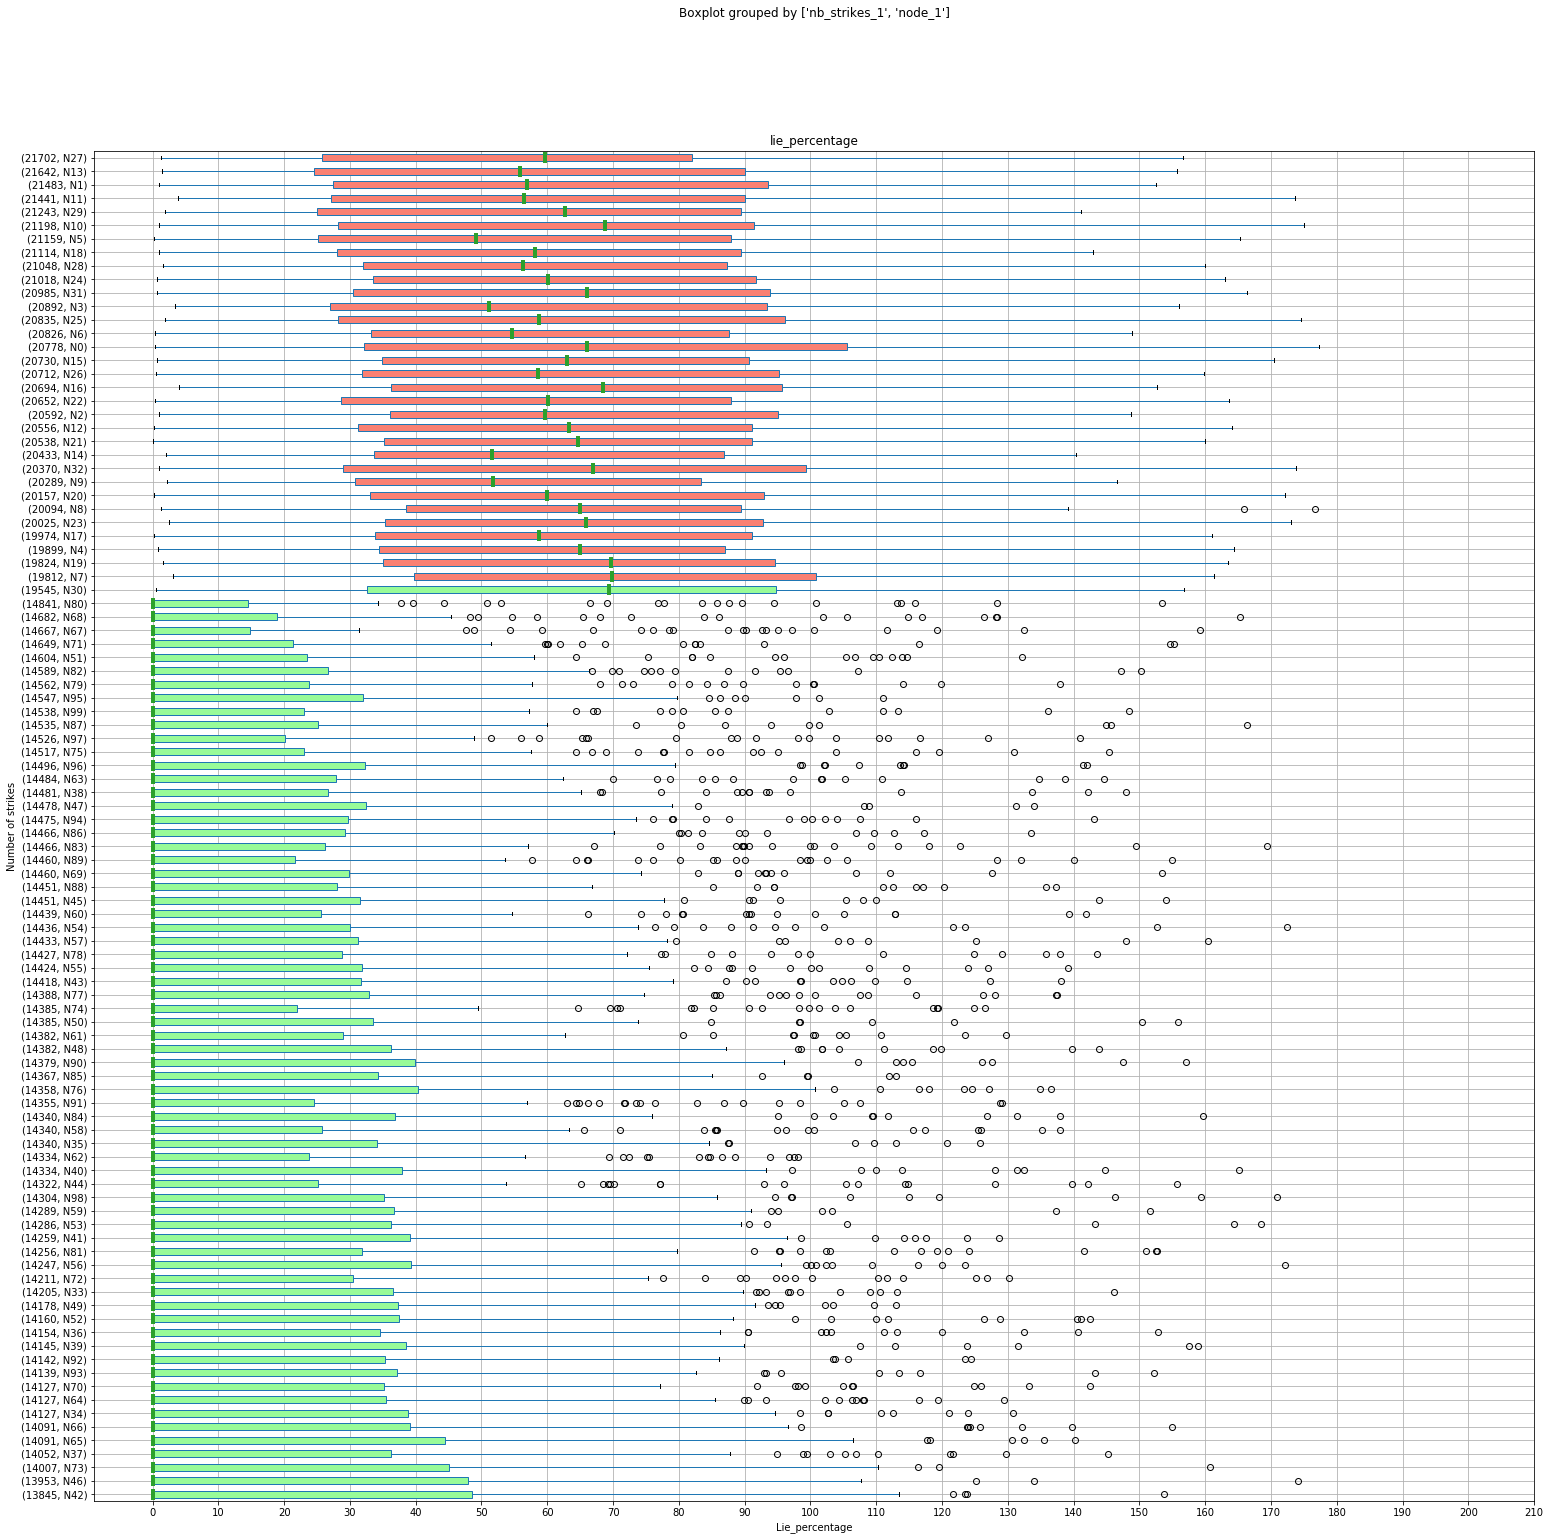

In [8]:
plt.figure()

percentages = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210]

medianprops = dict(linestyle='-', linewidth=4, color='blue')

size = 25
if N == "200":
    size = 50

bp = pd.DataFrame.boxplot( data,
    column="lie_percentage",
    by=["nb_strikes_1", "node_1"], 
    figsize=(size, size), 
    vert=False, 
    medianprops=medianprops,
    return_type='both', 
    patch_artist = True)
    
colors = ['salmon', 'palegreen']
for row_key, (ax,row) in bp.iteritems():
    ax.set_xticks(percentages)
    ax.set_xlabel('Lie_percentage')
    ax.set_ylabel('Number of strikes')
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(colors[nb_strikes[i] < threshold ])
        

#ax.set_yticks(np.arange(0, 100, step=500))

In [9]:
fig = ax.get_figure()
